# Random Forest

## Explore Random Forest Results with various Undersampling and Oversampling methods.

Undersampling methods to explore:
- Random Undersampling
- Cluster Centroids Undersampling
- Near Miss Undersampling 

Oversampling methods to explore:
- Random Oversampling
- SMOTE
- ADASYN

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from src import model_results
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.drop('Time',axis=1,inplace=True)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Class',axis=1)
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

# Undersample training data (Random Undersampling, Cluster Centroids, Near Miss

## Random Undersampling 

In [8]:
rfc_under = RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=5)

In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
random_undersampler = RandomUnderSampler(random_state=111)

In [11]:
X_random_under, y_random_under = random_undersampler.fit_sample(X_train,y_train)

In [12]:
#The number of Non-Fraudent data in the test set is being undersampled (with random undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_random_under==0)
Fraud_count_random = sum(y_random_under==1)
print('Number of Non-Fradulent in test data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in test data = '+ str(Fraud_count_random))

Number of Non-Fradulent in test data = 339
Number of Fradulent in test data = 339


Accuracy: 0.971513172524373


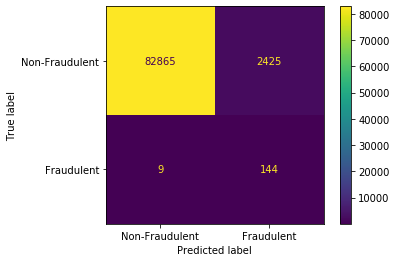

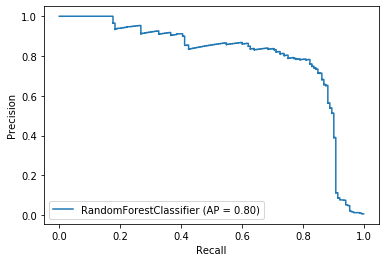

In [13]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(rfc_under,X_random_under,y_random_under,X_test,y_test)

## Cluster Centroids Undersampling

In [14]:
from imblearn.under_sampling import ClusterCentroids

In [15]:
cc_undersampler = ClusterCentroids(sampling_strategy = 'majority',random_state=111) #undersample the majority class

In [16]:
X_cc_under, y_cc_under = cc_undersampler.fit_sample(X_train,y_train)

In [17]:
#The number of Non-Fraudent data in the test set is being undersampled (with cluster centroid undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_cc_under==0)
Fraud_count_random = sum(y_cc_under==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 339
Number of Fradulent in training data = 339


Accuracy: 0.696160013108154


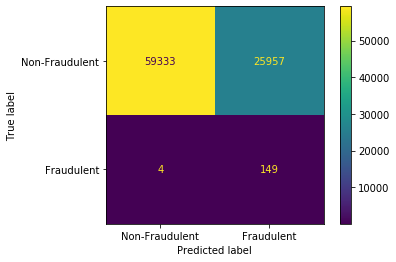

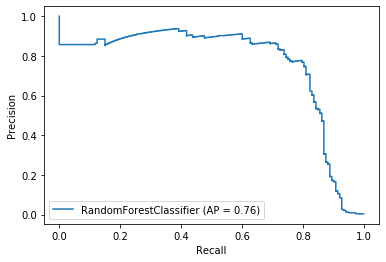

In [18]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(rfc_under,X_cc_under,y_cc_under,X_test,y_test)

## Near Miss Undersampling

In [19]:
from imblearn.under_sampling import NearMiss

In [20]:
nm_undersampler_v3 = NearMiss(version=3)

In [21]:
X_nm_under, y_nm_under = nm_undersampler_v3.fit_sample(X_train,y_train)

In [22]:
#The number of Non-Fraudent data in the test set is being undersampled (with near miss undersampling)
#and is now equal to the number of Fraudent data in the test set (339)

Non_Fraud_count_random = sum(y_nm_under==0)
Fraud_count_random = sum(y_nm_under==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 339
Number of Fradulent in training data = 339


Accuracy: 0.9409547885724986


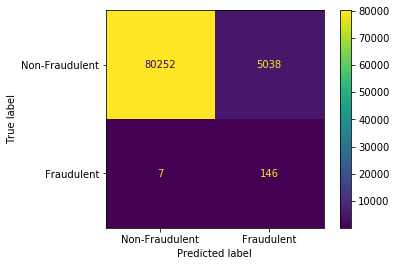

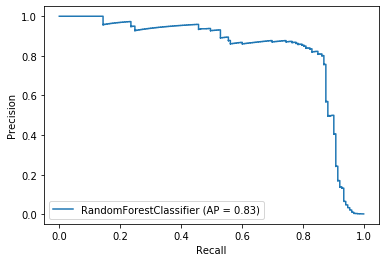

In [23]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(rfc_under,X_nm_under,y_nm_under,X_test,y_test)

# Oversample training data (Random Oversampling, SMOTE, ADASYN) 

## Random Oversampling

In [24]:
rfc_over = RandomForestClassifier(n_estimators=300,min_samples_split=40,min_samples_leaf=20)

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
random_oversampler = RandomOverSampler(random_state=111)

In [27]:
X_random_over, y_random_over = random_oversampler.fit_sample(X_train,y_train)

In [28]:
Non_Fraud_count_random = sum(y_random_over==0)
Fraud_count_random = sum(y_random_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 199025


Accuracy: 0.9993914071369217


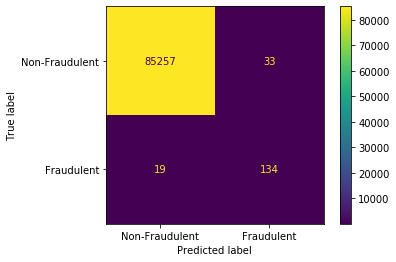

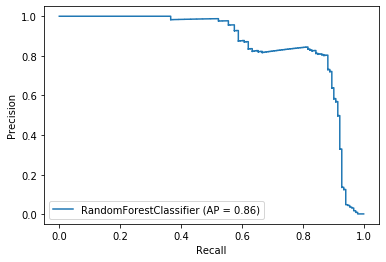

In [29]:
#Get Accuracy score, confusion matrix and precision recall curve
model_results(rfc_over,X_random_over,y_random_over,X_test,y_test)

## SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote_oversampler = SMOTE(k_neighbors=20,random_state=111)

In [32]:
X_smote_over, y_smote_over = smote_oversampler.fit_sample(X_train,y_train)

In [33]:
Non_Fraud_count_random = sum(y_smote_over==0)
Fraud_count_random = sum(y_smote_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 199025


Accuracy: 0.9987477031471274


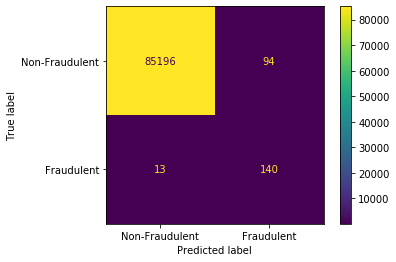

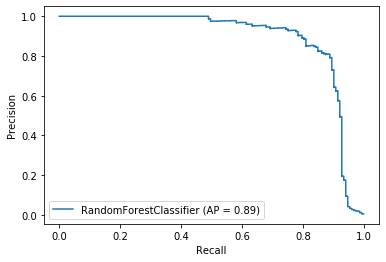

In [34]:
model_results(rfc_over,X_smote_over,y_smote_over,X_test,y_test)

## ADASYN

In [35]:
from imblearn.over_sampling import ADASYN

In [37]:
adasyn_oversampler = ADASYN(n_neighbors=20,random_state=111)

In [38]:
X_adasyn_over, y_adasyn_over = adasyn_oversampler.fit_sample(X_train,y_train)

In [39]:
Non_Fraud_count_random = sum(y_adasyn_over==0)
Fraud_count_random = sum(y_adasyn_over==1)
print('Number of Non-Fradulent in training data = '+ str(Non_Fraud_count_random))
print('Number of Fradulent in training data = '+ str(Fraud_count_random))

Number of Non-Fradulent in training data = 199025
Number of Fradulent in training data = 199024


Accuracy: 0.9985487400957364


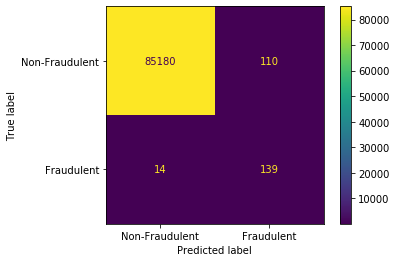

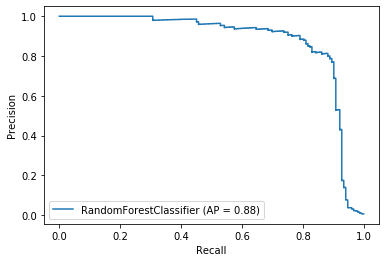

In [40]:
model_results(rfc_over,X_adasyn_over,y_adasyn_over,X_test,y_test)